In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

df=pd.read_csv('Guerry.csv')
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region'] #variables de interés
df=df[vars]
df=df.dropna()
df[-5:]

y,x=dmatrices('Lottery ~ Literacy+Wealth+Region',data=df, return_type='dataframe')
x

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from  patsy import dmatrices as dm
#Crear un dataframe
df=pd.DataFrame({
    'X':[1,2,3,4,5],
    'Y':[2,4,5,4,5]
})

y,x=dm('Y ~ X',data=df, return_type='dataframe')

model=sm.OLS(y,x)
res=model.fit()

res.summary()


c:\Users\admin\Desktop\Icaro\Codigo\Resumen\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Wed, 22 Nov 2023   Prob (F-statistic):              0.124
Time:                        12:58:52   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2000      0.938      2.345      0.101      -0.785       5.185
X              0.6000      0.283      2.121      0.124      -0.300       1.500
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.017
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.570
Skew:                           0.289   Prob(JB):                        0.752
Kurtosis:                       1.450   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset incorporado de seaborn
df = sns.load_dataset("tips")

X=sm.add_constant(df[['total_bill', 'size']]) #Matriz de diseño
y=df['tip']

model=sm.OLS(y,X).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           9.67e-34
Time:                        15:10:40   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

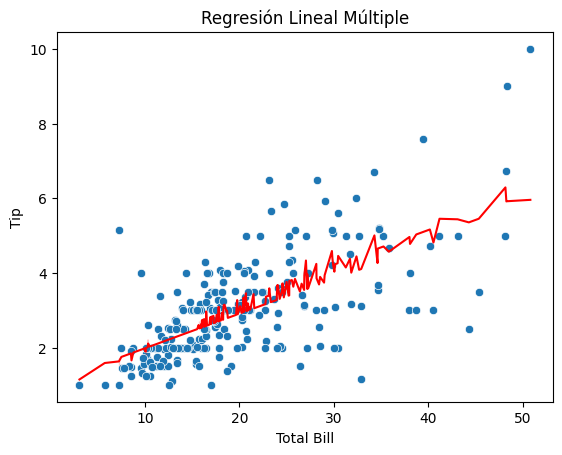

In [25]:
df
sns.scatterplot(x='total_bill',y='tip',data=df)
sns.lineplot(x=df['total_bill'],y=model.predict(X),color= 'red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Regresión Lineal Múltiple')
plt.show()

<Axes: >

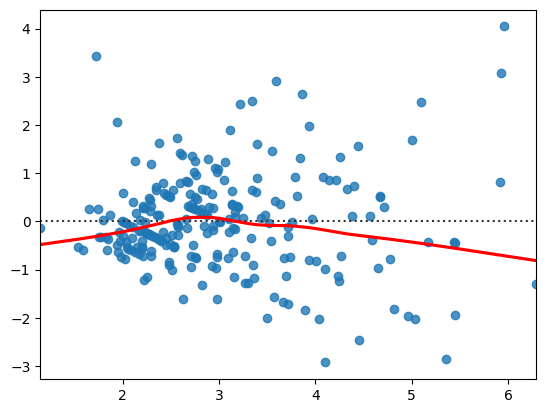

In [26]:
sns.residplot(x=model.fittedvalues,y=model.resid,lowess=True, line_kws={'color':'red'})